In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))


In [3]:

import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u

import CtllDes 
from CtllDes.core import ctll, satellite

import poliastro 
from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from poliastro.frames import Planes
from poliastro.constants import J2000

In [4]:
a = 8000 * u.km # semi-major axis [distance]
ecc = 0 * u.one # eccentricity [dimensionleess]
inc = 97 * u.deg # inclination [angle] 
raan = 0 * u.rad # right ascencion of the ascending node [angle]
argp = 0 * u.rad # perigee argument [angle]
nu = 0 * u.rad # true anomaly [angle]

plane = Planes.EARTH_EQUATOR # not necessary to specify
epoch = J2000 # not necessary to specify

#classmethod of Orbit
orb = Orbit.from_classical(Earth,
                            a,
                            ecc,
                            inc,
                            raan,
                            argp,
                            nu)

In [ ]:
sat = sat.from_orbit(orb)

In [91]:
from CtllDes.core import instrument

camera = instrument.Camera(10, 4) # f_l, s_w
sat.update_instruments(camera, f=True) # force option
sat.instruments

In [ ]:
from CtllDes.targets.targets import Target

tgt = Target(0,30)

In [ ]:
from CtllDes.requests.coverage import Coverages

covs = []
for i in range(1,500):
    covs.append(Coverages.from_sat(sat, tgt, 4, dt=i, J2=True, drag=False).to_df())


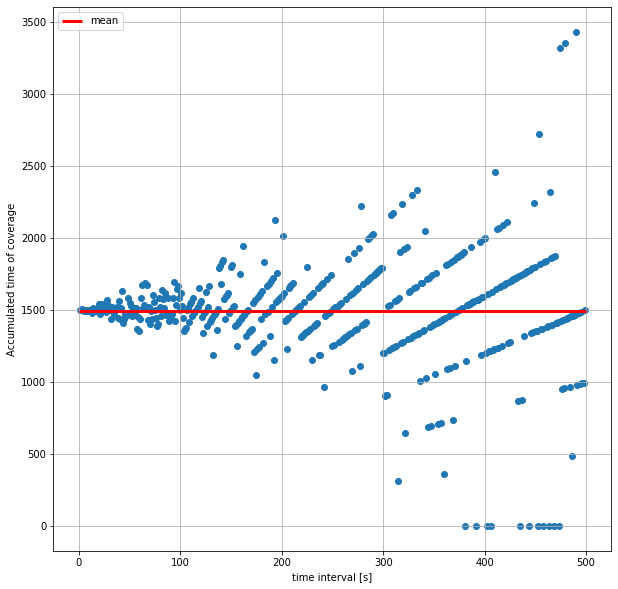

In [87]:
import matplotlib.pyplot as plt


accums = np.array([cov['accumulated'] for cov in covs])
mean = np.sum(accums)/len(accums)


plt.figure(figsize=(10,10))
plt.xlabel("time interval [s]")
plt.ylabel("Accumulated time of coverage")
plt.scatter([i for i in range(1,500)], accums,label='')
plt.grid()
plt.hlines(y=mean,xmin=0,xmax=500,color='red',linewidth=3,label='mean')
plt.legend(loc=2)

In [ ]:
a = 7000*u.km

plt.figure(figsize=(10,10))
plt.grid()
plt.hlines(y=1,xmin=0,xmax=100,color='red',linewidth=3)

sat_covs = []
for j in range(10):
    
    a += 500*u.km*j
    orb = Orbit.from_classical(Earth,a,ecc,inc,raan,argp,nu)
    sat = sat.from_orbit(orb)
    sat.update_instruments(camera, f=True)
    
    covs = []
    for i in range(1,100):
        covs.append(Coverages.from_sat(sat, tgt, 4, dt=i, J2=True, drag=False).to_df())
        
    sat_covs.append(covs)

131.03030303030303
260.09090909090907
1730.8484848484848
4607.868686868687
12729.626262626263
29002.858585858587


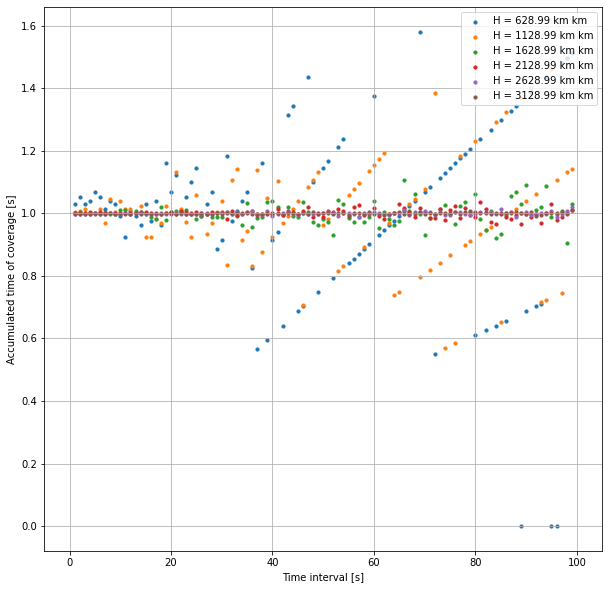

In [111]:

plt.figure(figsize=(10,10))
plt.grid()
plt.hlines(y=1,xmin=0,xmax=100,color='red',linewidth=0.1)
plt.xlabel("Time interval [s]")
plt.ylabel("Accumulated time of coverage [s]")

height = 7000*u.km - Earth.R_mean.to(u.km) 
for sat in sat_covs:
    accums = np.array([cov['accumulated'] for cov in sat])
    try:
        mean = np.sum(accums)/len(accums)
        plt.scatter([i for i in range(1,100)], accums/mean, s=10, label=f'H = {height:.2f} km')
        height += 500*u.km
        print(mean)
    except:
        pass

plt.legend(loc=1)



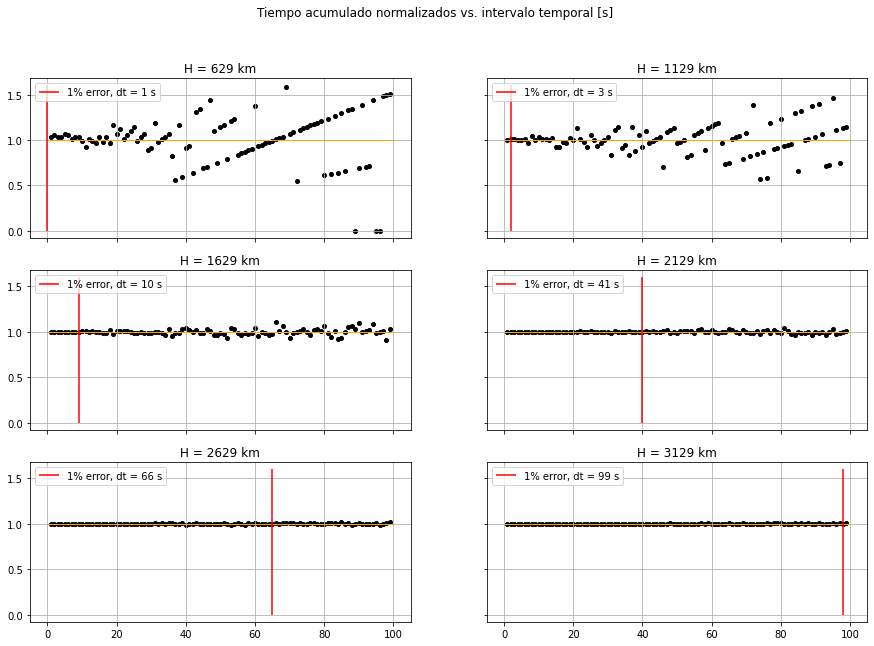

In [186]:
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(15,10),sharex=True,sharey=True)
plt.suptitle("Tiempo acumulado normalizados vs. intervalo temporal [s]")

ax = np.asarray(ax).reshape(-1)
height = 7000*u.km - Earth.R_mean.to(u.km) 


for j in range(len(ax)):
    accums = np.array([cov['accumulated'] for cov in sat_covs[j]])
    try:
        mean = np.sum(accums)/len(accums)
        ax[j].scatter([i for i in range(1,100)], accums/mean, s=16, c='k')
        ax[j].set_title(f'H = {height:.0f}')
        ax[j].grid()
        ax[j].hlines(y=1,xmin=0,xmax=100,color='orange',linewidth=1)
        for i in range(len(accums)):
            if accums[i]/mean > 1.01:
                idx = i
                break
        ax[j].vlines(x=idx,ymin=0,ymax=1.6,color='red',label= f"1% error, dt = {idx+1} s" )
        ax[j].legend(loc=2)
    except:
        pass    
    height += 500*u.km



In [190]:
sat_covs[0][0]

,T,dt,Satellite ID,Target,accumulated,mean gap light,mean gap dark,response time,average time gap,max gap
0,4,1,484a7c8a-f4e8-4030-b57e-20f136e4900e,"(0, 30)",135,67.5,115155.0,90593.642161,181186.288892,213500
